In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## [1] 데이터 준비

In [151]:
FILE_NAME = './mix_abalone_train.csv'

In [152]:
abalone = pd.read_csv(FILE_NAME)
abalone.shape

(94792, 9)

In [153]:
abalone.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


In [154]:
abalone.corr(numeric_only=True)

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
Length,1.000000,0.989600,0.911599,0.931092,0.908951,0.912522,0.910372,0.620809
Diameter,0.989600,1.000000,0.915261,0.933384,0.907634,0.913825,0.917211,0.634092
Height,0.911599,0.915261,1.000000,0.898076,0.857288,0.881601,0.899585,0.660468
Whole_weight,0.931092,0.933384,0.898076,1.000000,0.971160,0.973909,0.963767,0.613666
Shucked_weight,0.908951,0.907634,0.857288,0.971160,1.000000,0.948351,0.910346,0.510597
Viscera_weight,0.912522,0.913825,0.881601,0.973909,0.948351,1.000000,0.935596,0.584903
Shell_weight,0.910372,0.917211,0.899585,0.963767,0.910346,0.935596,1.000000,0.691610
Rings,0.620809,0.634092,0.660468,0.613666,0.510597,0.584903,0.691610,1.000000


In [155]:
abalone.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')

모든 변수에 대해 boxplot 다 확인하기

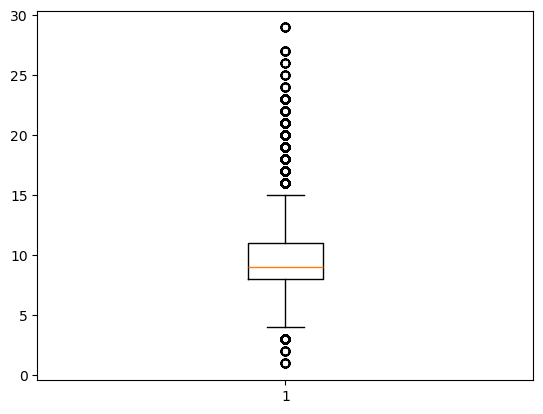

In [62]:
plt.boxplot(abalone['Rings'])
plt.show()

In [63]:
abalone['Rings'].describe()

count    94792.000000
mean         9.707233
std          3.178704
min          1.000000
25%          8.000000
50%          9.000000
75%         11.000000
max         29.000000
Name: Rings, dtype: float64

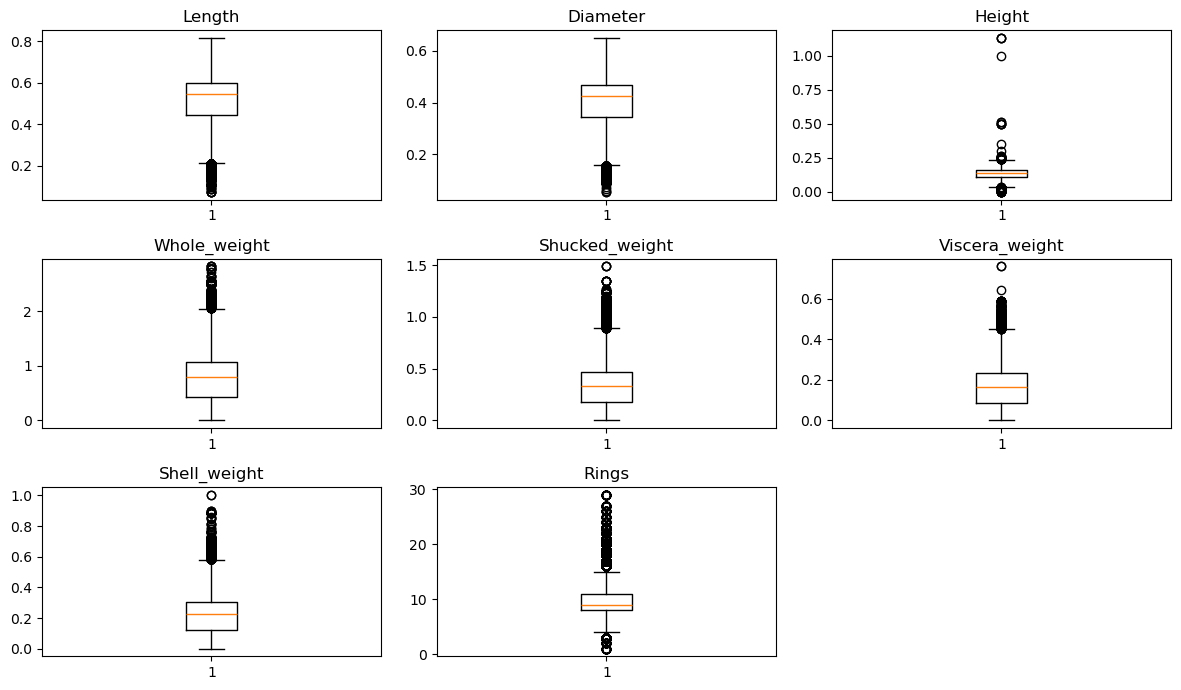

In [156]:
col = 3
row = len(abalone.columns)// 3

plt.figure(figsize=(12,7))

# 수치형 데이터만 boxplot 그리도록
for i, column_name in enumerate(abalone.select_dtypes(include=np.number).columns,1):
  # 인덱스를 1로 지정
  plt.subplot(col, row, i)
  plt.title(column_name)
  plt.boxplot(abalone[column_name])

plt.tight_layout() # 간격 사이 조정을 위해 사용
plt.show()

In [157]:
abalone = abalone[abalone['Height'] != 0.].copy()
abalone.reset_index(inplace=True, drop=True)
abalone.shape

(94784, 9)

In [66]:
abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94784 entries, 0 to 94783
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             94784 non-null  object 
 1   Length          94784 non-null  float64
 2   Diameter        94784 non-null  float64
 3   Height          94784 non-null  float64
 4   Whole_weight    94784 non-null  float64
 5   Shucked_weight  94784 non-null  float64
 6   Viscera_weight  94784 non-null  float64
 7   Shell_weight    94784 non-null  float64
 8   Rings           94784 non-null  int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 6.5+ MB


In [67]:
abalone.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')

In [158]:
abalone = pd.get_dummies(abalone)

In [69]:
abalone.columns

Index(['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings', 'Sex_F', 'Sex_I', 'Sex_M'],
      dtype='object')

In [159]:
abalone.replace(True, 1, inplace = True)
abalone.replace(False, 0, inplace = True)

C:\Users\sh321\AppData\Local\Temp\ipykernel_3760\1420829749.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  abalone.replace(False, 0, inplace = True)


In [160]:
abalone['Rings'] = abalone['Rings'] + 1.5

In [162]:
abalone

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Sex_F,Sex_I,Sex_M
0,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,12.5,1,0,0
1,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,12.5,1,0,0
2,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,7.5,0,1,0
3,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,11.5,0,0,1
4,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,10.5,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
94779,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,12.5,1,0,0
94780,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,11.5,0,0,1
94781,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,10.5,0,0,1
94782,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,11.5,1,0,0


각 컬럼 데이터 분포 그래프 확인

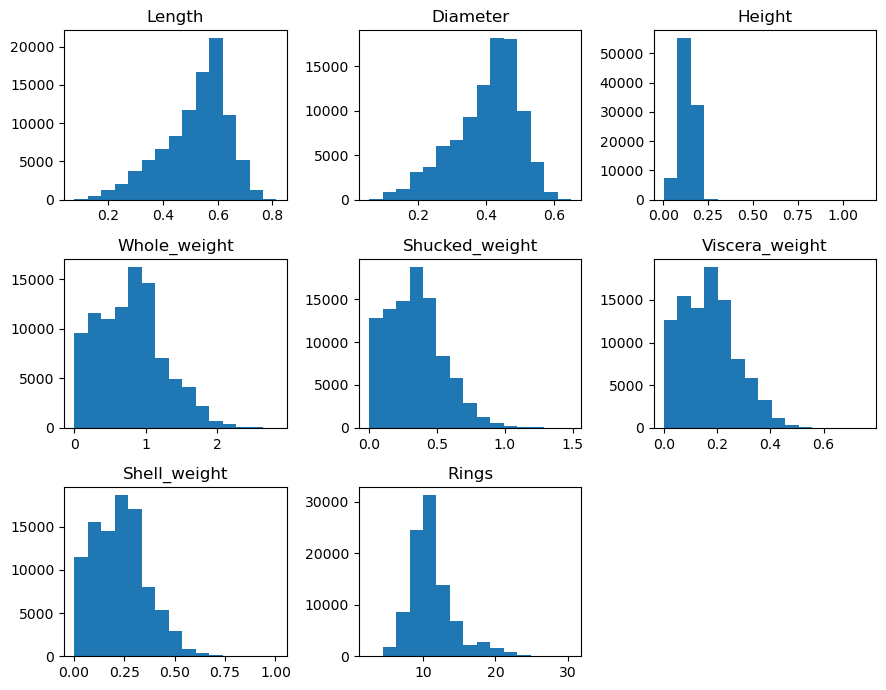

In [163]:
col = 3
row = len(abalone.loc[:,"Length":"Rings"].columns)//3 + 1

plt.figure(figsize=(9,7))

for i, column_name in enumerate(abalone.loc[:,"Length":"Rings"].columns,1): # 인덱스를 1로 지정
  plt.subplot(col, row, i)

  plt.title(column_name)
  plt.hist(abalone[column_name], bins=15)

plt.tight_layout() # 간격 사이 조정을 위해 사용
plt.show()

In [164]:
from scipy.stats import boxcox

# Box-Cox 변환
# 1D 데이터로 변환해야 함
# 결과값과 λ 값 반환 (λ는 무시 가능)
abalone['Length'], lambda_length = boxcox(abalone['Length'])
abalone['Diameter'], lambda_diameter = boxcox(abalone['Diameter'])

# 제곱근 변환
abalone.loc[:, "Height":"Rings"] = np.sqrt(abalone.loc[:, "Height":"Rings"])


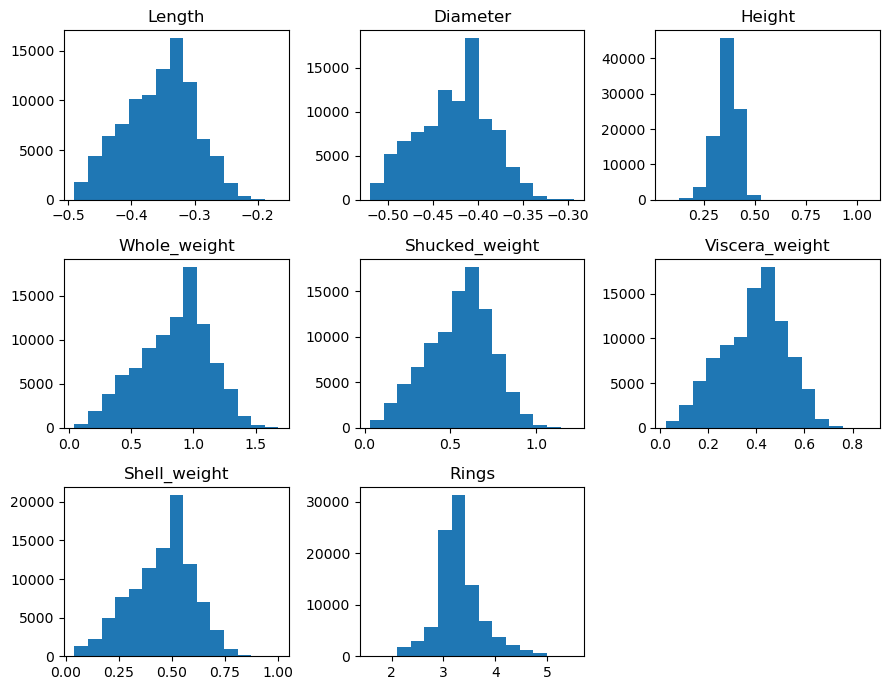

In [165]:
col = 3
row = len(abalone.loc[:,"Length":"Rings"].columns)//3 + 1

plt.figure(figsize=(9,7))

for i, column_name in enumerate(abalone.loc[:,"Length":"Rings"].columns,1): # 인덱스를 1로 지정
  plt.subplot(col, row, i)

  plt.title(column_name)
  plt.hist(abalone[column_name], bins=15)

plt.tight_layout() # 간격 사이 조정을 위해 사용
plt.show()

In [166]:
abalone

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Sex_F,Sex_I,Sex_M
0,-0.346397,-0.418419,0.387298,0.878351,0.573149,0.382753,0.489898,3.535534,1,0,0
1,-0.299892,-0.388945,0.380789,1.063015,0.676757,0.525833,0.565685,3.535534,1,0,0
2,-0.481068,-0.514495,0.158114,0.144914,0.074162,0.054772,0.070711,2.738613,0,1,0
3,-0.321036,-0.396643,0.387298,0.956295,0.612781,0.453321,0.500000,3.391165,0,0,1
4,-0.343680,-0.420717,0.360555,0.884308,0.607865,0.400000,0.444410,3.240370,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
94779,-0.338171,-0.408986,0.406202,0.941807,0.608276,0.488876,0.498999,3.535534,1,0,0
94780,-0.323955,-0.413752,0.367423,0.982853,0.662571,0.463141,0.510392,3.391165,0,0,1
94781,-0.318091,-0.396643,0.452769,1.084435,0.724914,0.536190,0.554977,3.240370,0,0,1
94782,-0.302989,-0.391535,0.387298,1.046184,0.728697,0.510882,0.544059,3.391165,1,0,0


In [77]:
feature_df = abalone[['Sex_F', 'Sex_I', 'Sex_M', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight','Viscera_weight', 'Shell_weight']].copy()
target_sr = abalone['Rings']

In [78]:
feature_df

,Sex_F,Sex_I,Sex_M,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,1,0,0,-0.346397,-0.418419,0.387298,0.878351,0.573149,0.382753,0.489898
1,1,0,0,-0.299892,-0.388945,0.380789,1.063015,0.676757,0.525833,0.565685
2,0,1,0,-0.481068,-0.514495,0.158114,0.144914,0.074162,0.054772,0.070711
3,0,0,1,-0.321036,-0.396643,0.387298,0.956295,0.612781,0.453321,0.500000
4,0,1,0,-0.343680,-0.420717,0.360555,0.884308,0.607865,0.400000,0.444410
...,...,...,...,...,...,...,...,...,...,...
94779,1,0,0,-0.338171,-0.408986,0.406202,0.941807,0.608276,0.488876,0.498999
94780,0,0,1,-0.323955,-0.413752,0.367423,0.982853,0.662571,0.463141,0.510392
94781,0,0,1,-0.318091,-0.396643,0.452769,1.084435,0.724914,0.536190,0.554977
94782,1,0,0,-0.302989,-0.391535,0.387298,1.046184,0.728697,0.510882,0.544059


In [79]:
feature_df.describe()

,Sex_F,Sex_I,Sex_M,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
count,94784.000000,94784.000000,94784.000000,94784.000000,94784.000000,94784.000000,94784.000000,94784.000000,94784.000000,94784.000000
mean,0.293320,0.363236,0.343444,-0.356435,-0.426195,0.364276,0.843531,0.553012,0.390141,0.451946
std,0.455286,0.480935,0.474861,0.055718,0.039638,0.054381,0.281571,0.189186,0.133090,0.149046
min,0.000000,0.000000,0.000000,-0.490476,-0.520092,0.063246,0.044721,0.031623,0.022361,0.038730
25%,0.000000,0.000000,0.000000,-0.397620,-0.454105,0.331662,0.647688,0.421307,0.294958,0.346410
50%,0.000000,0.000000,0.000000,-0.349088,-0.420717,0.374166,0.894148,0.574456,0.407431,0.474342
75%,1.000000,1.000000,1.000000,-0.318091,-0.399160,0.400000,1.035616,0.681542,0.482701,0.552268
max,1.000000,1.000000,1.000000,-0.167437,-0.293322,1.063015,1.680922,1.219836,0.871780,1.002497


In [80]:
target_sr.describe()

count    94784.000000
mean         3.316488
std          0.456415
min          1.581139
25%          3.082207
50%          3.240370
75%          3.535534
max          5.522681
Name: Rings, dtype: float64

## [2] test, train 분리

In [174]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(feature_df,target_sr, test_size=0.2, random_state=12)

In [175]:
print(f'x_train : {x_train.shape}, y_train : {y_train.shape}')
print(f'x_test : {x_test.shape} , y_test : {y_test.shape}')

x_train : (75827, 10), y_train : (75827,)
x_test : (18957, 10) , y_test : (18957,)


In [83]:
from sklearn.preprocessing import MinMaxScaler

scaler_v = MinMaxScaler()
scaler_v.fit(x_train)

MinMaxScaler()

In [84]:
scaler_v.min_, scaler_v.data_min_

(array([ 0.        ,  0.        ,  0.        ,  1.51831958,  2.2934749 ,
        -0.0712591 , -0.02733244, -0.02661372, -0.02632467, -0.04018589]),
 array([ 0.        ,  0.        ,  0.        , -0.49047648, -0.52009242,
         0.07071068,  0.04472136,  0.03162278,  0.02236068,  0.03872983]))

In [85]:
scaler_v.scale_, scaler_v.data_max_

(array([1.        , 1.        , 1.        , 3.09560121, 4.40974494,
        1.00775579, 0.61117185, 0.84159975, 1.17727514, 1.03759513]),
 array([ 1.        ,  1.        ,  1.        , -0.16743745, -0.29332193,
         1.06301458,  1.68092237,  1.21983605,  0.87177979,  1.00249688]))

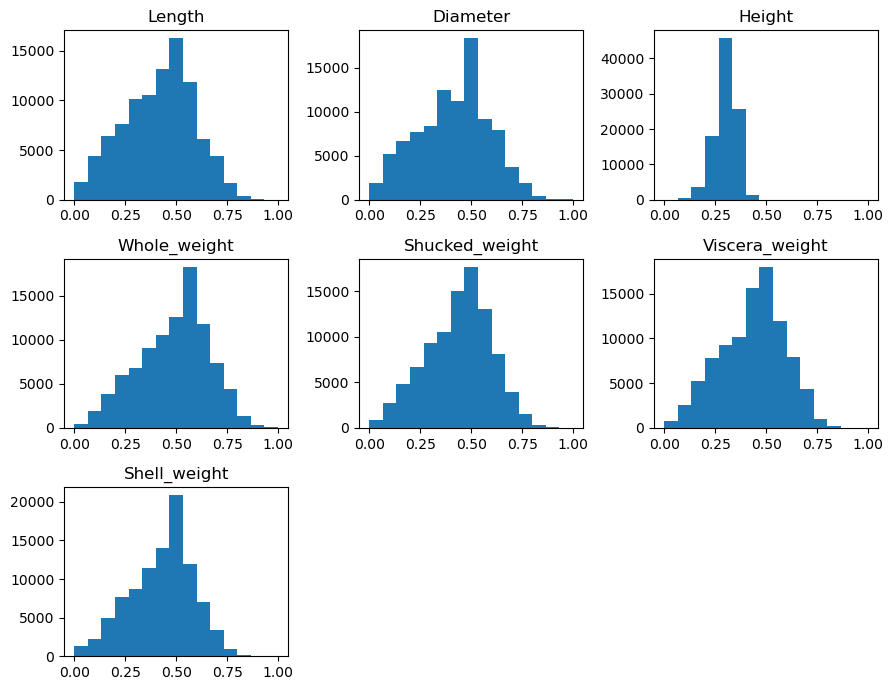

In [86]:
scaler_x = MinMaxScaler()
x_scaled = scaler_x.fit_transform(feature_df)
x_scaled = pd.DataFrame(x_scaled, columns=feature_df.columns)

col = 3
row = len(x_scaled.loc[:,"Length":"Shell_weight"].columns)//3 + 1

plt.figure(figsize=(9,7))

for i, column_name in enumerate(x_scaled.loc[:,"Length":"Shell_weight"].columns,1): # 인덱스를 1로 지정
  plt.subplot(col, row, i)

  plt.title(column_name)
  plt.hist(x_scaled[column_name], bins=15)

plt.tight_layout() # 간격 사이 조정을 위해 사용
plt.show()

(array([2.6000e+01, 3.0000e+01, 1.8600e+03, 2.9770e+03, 5.6690e+03,
        2.4460e+04, 3.1251e+04, 1.3880e+04, 6.9100e+03, 3.6810e+03,
        2.1230e+03, 1.2040e+03, 5.7200e+02, 7.3000e+01, 6.8000e+01]),
 array([0.        , 0.06666667, 0.13333333, 0.2       , 0.26666667,
        0.33333333, 0.4       , 0.46666667, 0.53333333, 0.6       ,
        0.66666667, 0.73333333, 0.8       , 0.86666667, 0.93333333,
        1.        ]),
 <BarContainer object of 15 artists>)

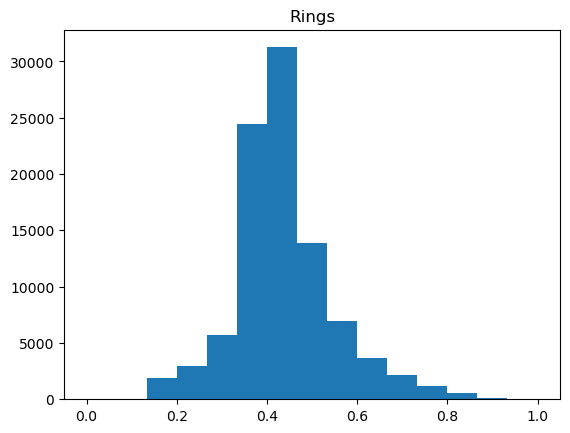

In [87]:
scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(target_sr.values.reshape(-1, 1))

y_scaled = pd.DataFrame(y_scaled)

plt.title("Rings")
plt.hist(y_scaled, bins=15)

In [176]:
scaler = MinMaxScaler()
scaler.fit(x_train)

MinMaxScaler()

In [177]:
x_train_scaled = scaler.transform(x_train)
x_train_scaled = pd.DataFrame(x_train_scaled, columns = x_train.columns)
x_train_scaled.shape

(75827, 10)

In [119]:
x_train_scaled.min(), x_train_scaled.max()

(Sex_F             0.0
 Sex_I             0.0
 Sex_M             0.0
 Length            0.0
 Diameter          0.0
 Height            0.0
 Whole_weight      0.0
 Shucked_weight    0.0
 Viscera_weight    0.0
 Shell_weight      0.0
 dtype: float64,
 Sex_F             1.0
 Sex_I             1.0
 Sex_M             1.0
 Length            1.0
 Diameter          1.0
 Height            1.0
 Whole_weight      1.0
 Shucked_weight    1.0
 Viscera_weight    1.0
 Shell_weight      1.0
 dtype: float64)

In [178]:
x_test_scaled = scaler.transform(x_test)
x_test_scaled = pd.DataFrame(x_test_scaled, columns = x_test.columns)
x_test_scaled.shape

(18957, 10)

In [121]:
x_test_scaled.min(), x_test_scaled.max()

(Sex_F             0.000000
 Sex_I             0.000000
 Sex_M             0.000000
 Length            0.016372
 Diameter          0.001615
 Height           -0.007523
 Whole_weight      0.021942
 Shucked_weight    0.000000
 Viscera_weight    0.000000
 Shell_weight      0.003836
 dtype: float64,
 Sex_F             1.000000
 Sex_I             1.000000
 Sex_M             1.000000
 Length            0.962730
 Diameter          0.941381
 Height            0.651942
 Whole_weight      1.000000
 Shucked_weight    0.915452
 Viscera_weight    1.000000
 Shell_weight      0.942521
 dtype: float64)

## [3_1] 앙상블 - Bagging

In [179]:
from sklearn.ensemble import RandomForestRegressor

In [123]:
rf_model = RandomForestRegressor(random_state=12, oob_score= True)
rf_model.fit(x_train_scaled, y_train)

RandomForestRegressor(oob_score=True, random_state=12)

In [124]:
print(f'feature_names_in_ : {rf_model.feature_names_in_}')
print(f'n_features_in_ : {rf_model.n_features_in_}개')
print(f'feature_importances_ : {rf_model.feature_importances_}')

feature_names_in_ : ['Sex_F' 'Sex_I' 'Sex_M' 'Length' 'Diameter' 'Height' 'Whole_weight'
 'Shucked_weight' 'Viscera_weight' 'Shell_weight']
n_features_in_ : 10개
feature_importances_ : [0.00427544 0.00785887 0.00425015 0.03801936 0.03352456 0.03595553
 0.06642831 0.12600068 0.05893235 0.62475475]


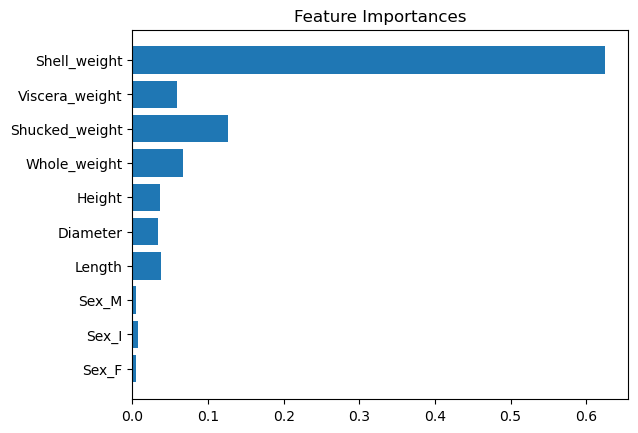

In [125]:
plt.barh(range(rf_model.n_features_in_), rf_model.feature_importances_)
plt.yticks(range(rf_model.n_features_in_), rf_model.feature_names_in_)
plt.title('Feature Importances')
plt.show()

In [126]:
print(f'oob_score_ : {rf_model.oob_score_}')

oob_score_ : 0.6792690640067092


In [127]:
train_score = rf_model.score(x_train_scaled, y_train)
test_score = rf_model.score(x_test_scaled, y_test)

print(f'train_score : {train_score}, test_score : {test_score}')

train_score : 0.9554185818812105, test_score : 0.6816547741691306


## [3-1_1] 모델 저장

In [180]:
from sklearn.model_selection import GridSearchCV
import joblib

In [ ]:
best_params = {'max_depth' : [15],
                'min_samples_leaf' : [9],
                'criterion' : ['poisson'],
                'min_samples_split' : [29],
                'max_features' : [1.0]}

In [130]:
best_model = RandomForestRegressor(random_state=12, oob_score= True)

In [131]:
best_search = GridSearchCV(best_model, param_grid=best_params, scoring='r2',refit=True, cv=10, verbose=4)

In [132]:
best_search.fit(x_train_scaled, y_train)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV 1/10] END criterion=poisson, max_depth=15, max_features=1.0, min_samples_leaf=9, min_samples_split=29;, score=0.700 total time=  39.5s
[CV 2/10] END criterion=poisson, max_depth=15, max_features=1.0, min_samples_leaf=9, min_samples_split=29;, score=0.695 total time=  37.0s
[CV 3/10] END criterion=poisson, max_depth=15, max_features=1.0, min_samples_leaf=9, min_samples_split=29;, score=0.703 total time=  37.0s
[CV 4/10] END criterion=poisson, max_depth=15, max_features=1.0, min_samples_leaf=9, min_samples_split=29;, score=0.689 total time=  37.7s
[CV 5/10] END criterion=poisson, max_depth=15, max_features=1.0, min_samples_leaf=9, min_samples_split=29;, score=0.686 total time=  40.3s
[CV 6/10] END criterion=poisson, max_depth=15, max_features=1.0, min_samples_leaf=9, min_samples_split=29;, score=0.685 total time=  33.9s
[CV 7/10] END criterion=poisson, max_depth=15, max_features=1.0, min_samples_leaf=9, min_samples_split=29

GridSearchCV(cv=10,
             estimator=RandomForestRegressor(oob_score=True, random_state=12),
             param_grid={'criterion': ['poisson'], 'max_depth': [15],
                         'max_features': [1.0], 'min_samples_leaf': [9],
                         'min_samples_split': [29]},
             scoring='r2', verbose=4)

In [ ]:
joblib.dump((lambda_length, lambda_diameter), 'x_boxcox_lambdas.joblib')

['x_boxcox_lambdas.pkl']

In [ ]:
joblib.dump(best_search.best_estimator_, "./model_ml_bagging.joblib")
joblib.dump(scaler, './scaler_ml_bagging.joblib')

['./scaler_ml_bagging.pkl']

In [134]:
print(f'[best_search.best_score_] {best_search.best_score_}')
print(f'[best_search.best_param] {best_search.best_params_}')
print(f'[best_search.best_estimator_] {best_search.best_estimator_}')

cv_result_df = pd.DataFrame(best_search.cv_results_)
cv_result_df

[best_search.best_score_] 0.693831845649219
[best_search.best_param] {'criterion': 'poisson', 'max_depth': 15, 'max_features': 1.0, 'min_samples_leaf': 9, 'min_samples_split': 29}
[best_search.best_estimator_] RandomForestRegressor(criterion='poisson', max_depth=15, min_samples_leaf=9,
                      min_samples_split=29, oob_score=True, random_state=12)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,params,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,37.068188,3.591634,0.141326,0.024881,poisson,15,1.0,9,29,"{'criterion': 'poisson', 'max_depth': 15, 'max...",...,0.68905,0.686455,0.685132,0.694276,0.695561,0.704439,0.68632,0.693832,0.006631,1


In [135]:
best_search.best_estimator_.score(x_test_scaled,y_test )

0.6953968154550951

In [172]:
x_test.columns

Index(['Sex_F', 'Sex_I', 'Sex_M', 'Length', 'Diameter', 'Height',
       'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight'],
      dtype='object')

In [ ]:
# 입력 데이터 전처리

length_process = boxcox(0.55, lambda_length)
diameter_process = boxcox(0.43, lambda_diameter)
height_process = np.sqrt(0.15)
whole_weight_process = np.sqrt(0.7715)
shucked_weight_process = np.sqrt(0.3285)
viscera_weight_process = np.sqrt(0.1465)
shell_weight_process = np.sqrt(0.24)

test = [[1, 0, 0, length_process, diameter_process,height_process,whole_weight_process,shucked_weight_process,viscera_weight_process, shell_weight_process]]
test_scaled = scaler.transform(test)
test_scaled = pd.DataFrame(test_scaled, columns=x_test.columns)

best = best_search.best_estimator_

best.predict(test_scaled) ** 2

c:\Users\sh321\anaconda3\envs\web_basic_39\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([11.58607828])